<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/bt_starting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bt

     |████████████████████████████████| 2.7MB 2.8MB/s 
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533306 sha256=d0b127a2ddf1f18fb114941e36e1ca85eacabeff77a9dc70640c5d9deb6bdf1a
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=5eaed0dec7fc44df4ae2f1a9c61f107971b24ad05576b2ff4af35a38384f2a0b
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built bt ffn


In [3]:
import bt

/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
%matplotlib inline

In [13]:
# fetch some data
data = bt.get(['AAPL','GE','BAC','AMD','PLUG','F'], start='2010-01-01')
print( data.head())

                aapl         ge        bac   amd  plug         f
Date                                                            
2010-01-04  6.604801  10.733057  13.816905  9.70   7.0  7.238358
2010-01-05  6.616219  10.788632  14.266021  9.71   7.0  7.717158
2010-01-06  6.510980  10.733057  14.433337  9.57   6.7  8.005848
2010-01-07  6.498945  11.288810  14.908874  9.47   6.7  8.210042
2010-01-08  6.542150  11.531955  14.776777  9.43   6.8  8.231167


In [14]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [15]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

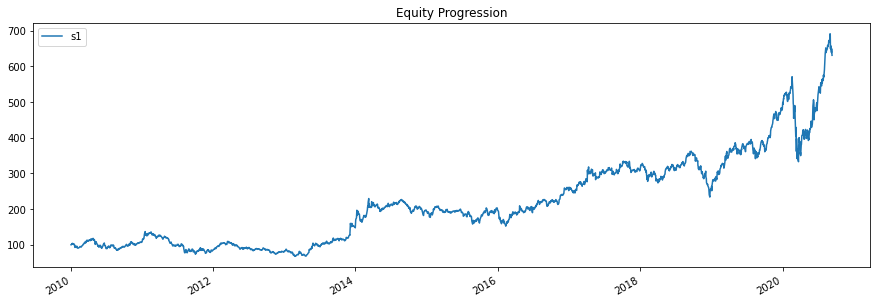

In [16]:
# first let's see an equity curve
res.plot()

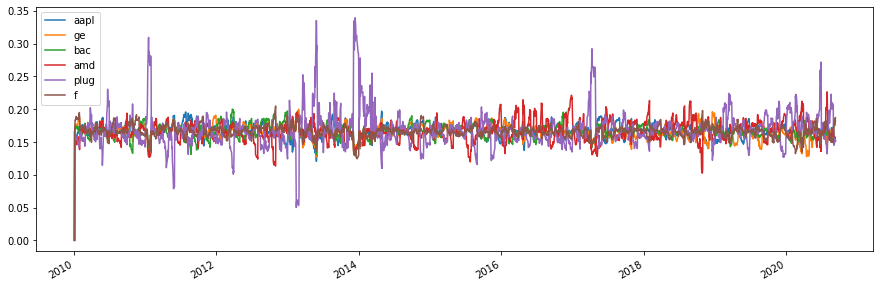

In [17]:
res.plot_security_weights()

In [18]:
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2020-09-11
Risk-free rate       0.00%

Total Return         530.72%
Daily Sharpe         0.72
Daily Sortino        1.19
CAGR                 18.80%
Max Drawdown         -50.58%
Calmar Ratio         0.37

MTD                  -6.52%
3m                   40.11%
6m                   54.26%
YTD                  31.04%
1Y                   65.21%
3Y (ann.)            27.65%
5Y (ann.)            30.00%
10Y (ann.)           21.28%
Since Incep. (ann.)  18.80%

Daily Sharpe         0.72
Daily Sortino        1.19
Daily Mean (ann.)    21.90%
Daily Vol (ann.)     30.53%
Daily Skew           0.10
Daily Kurt           7.06
Best Day             14.06%
Worst Day            -13.99%

Monthly Sharpe       0.76
Monthly Sortino      1.61
Monthly Mean (ann.)  22.26%
Monthly Vol (ann.)   29.39%
Monthly Skew         0.51
Monthly Kurt         1.18
Best Month           35.84%
Worst Month          -18.19%